# Notes: So, about those error bars...

In which we will make sense of the common delusion of error bars.

The Poisson example we've used so far when thinking about [Generative Models](generative_models.ipynb) and [Bayes' Law](bayes_law.ipynb) is one where the idea of an error bar doesn't really apply. We measure a certain number of counts, period. That's it. It doesn't make sense to say that we measured, as the case may be, 5 $\pm$ something (even more so if that something is not an integer), because literally what we measured was the number 5.[$^1$](#Note-1)

But error bars are enough of a thing that even the most pedantic among us will talk about them fairly often. So what's the deal?

The short answer is that we should think of an "error bar" as encoding uncertainty in the model prediction for a given datum, and the tendency to portray the error as a property of the data is an unfortunate figure of speach.

The longer answer is that there are often sources of uncertainty in the model that are not directly dependent on the parameters we care about, and that may be specific to each datum. Portray the uncertainty as a range about each data point, in the usual "error bar" fashion, is arguably the simplest way to visualize it in this case.

Let's look at a contrived example.

## Contrived example

Specifically, let's expand on the previous Poisson example by imagining we (a) measure a number of counts (with the same telescope and exposure time) from many stars with different masses, and (b) live in magical universe where stars have name tags that tell us their precise masses. We're interested in how luminosity, which is directly proportional to the expectation value for the number of measured counts, relates to this magically known mass. In generative terms,
* masses $M_i$ are known somehow,
* fluxes $F_i \Leftarrow$ $M_i$,
* expected counts $\mu_i \Leftarrow F_i$,
* measured counts $N_i \sim \mathrm{Poisson}(\mu_i)$.

For concreteness, let's arbitrarily implement the details as
* Choose $M_i$ uniformly in some range (we'll vary the range to explore the limits of "faint" and "bright" sources),
* Let $F_i=M_i^{0.5}$,
* Let $\mu_i = 2F_i$.

Here's a made-up data set.

In [1]:
# get a bunch of imports out of the way
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
import numpy as np
import scipy.stats as st
%matplotlib inline

In [2]:
M = st.uniform.rvs(1.0, 100.0, size=10)
F = np.sqrt(M)
mu = 2*F
N = st.poisson.rvs(mu)

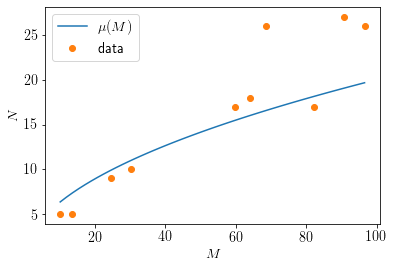

In [3]:
Mgrid = np.linspace(M.min(), M.max())
mu_of_Mgrid = 2*np.sqrt(Mgrid)
plt.plot(Mgrid, mu_of_Mgrid, label=r'$\mu(M)$');
plt.plot(M, N, 'o', label='data');
plt.xlabel(r'$M$', fontsize='x-large');
plt.ylabel(r'$N$', fontsize='x-large');
plt.legend(fontsize='x-large');

Here the curve shows the Poisson mean as a function of $M$. Clearly, the data don't sit on the curve, nor should they. But it would be nice to represent the width of the sampling distribution somehow, so we can see how compatible the data are with the model. Among other possibilities, we might do that by also showing curves reflecting the 16th and 84th percentiles of the sampling distribution, in addition to the mean, as a function of $M$ (so that the probability between the curves, at fixed $M$, is 68%). That would look like this:

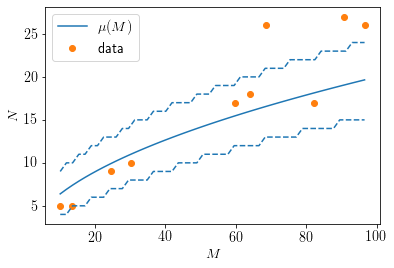

In [4]:
Nlower = st.poisson.ppf(0.16, mu_of_Mgrid)
Nupper = st.poisson.ppf(0.84, mu_of_Mgrid)
plt.plot(Mgrid, mu_of_Mgrid, label=r'$\mu(M)$');
plt.plot(M, N, 'o', label='data');
plt.plot(Mgrid, Nlower, '--', color='C0');
plt.plot(Mgrid, Nupper, '--', color='C0');
plt.xlabel(r'$M$', fontsize='x-large');
plt.ylabel(r'$N$', fontsize='x-large');
plt.legend(fontsize='x-large');

You can see that about $2/3$ of the data lie within these limits. The jaggedness of the lines is due to the fact that, of course, we can only get integers out of the Poisson distribution. Note that it makes sense to visualize the model uncertainty this way because the uncertainty on $N$ (on the $y$ axis) is directly and exclusively a function of $M$ (on the $x$ axis); otherwise, we couldn't draw unique curves associated with the extent of sampling distribution.

Let's now take this to a regime where there would be many more counts in each measurement.

In [5]:
M = st.uniform.rvs(1000.0, 10000.0, size=10)
F = np.sqrt(M)
mu = 2*F
N = st.poisson.rvs(mu)

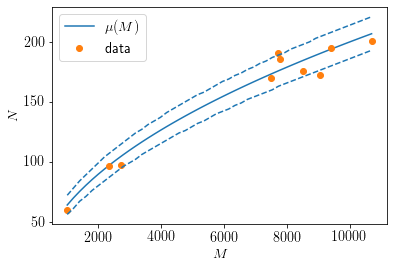

In [6]:
Mgrid = np.linspace(M.min(), M.max())
mu_of_Mgrid = 2*np.sqrt(Mgrid)
Nlower = st.poisson.ppf(0.16, mu_of_Mgrid)
Nupper = st.poisson.ppf(0.84, mu_of_Mgrid)
plt.plot(Mgrid, mu_of_Mgrid, label=r'$\mu(M)$');
plt.plot(M, N, 'o', label='data');
plt.plot(Mgrid, Nlower, '--', color='C0');
plt.plot(Mgrid, Nupper, '--', color='C0');
plt.xlabel(r'$M$', fontsize='x-large');
plt.ylabel(r'$N$', fontsize='x-large');
plt.legend(fontsize='x-large');

We're now well into the limit where the Poisson (mean $\mu$) distribution begins to resemble the Gaussian distribution (mean $\mu$ and standard deviation $\sqrt \mu$). As we're looking at many more counts, the discreteness of the dashed lines is also harder to see.

Now, we might think about displaying this with $F$ rather than the actual measurement, $N$, on the $y$ axis. Of course, we know that the plotted points don't actually correspond to the true flux of each star, only the naive extimate we would make by plugging through the equations at the top of the notebook and ignoring any uncertainty in the model. So let's call it "estimated flux", $\hat{F}$, instead. We'll use the fact that we're now in the Gaussian limit to simply compute the dashed limits on the model prediction as the mean $\pm$ the standard deviation (but could also have just devided the curves above by 2).

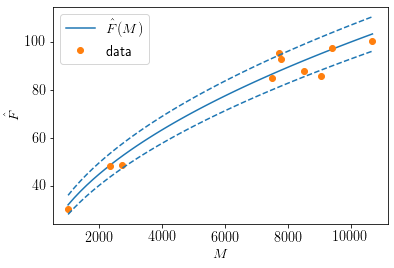

In [7]:
F_of_Mgrid = mu_of_Mgrid / 2.
Flower = (mu_of_Mgrid - np.sqrt(mu_of_Mgrid)) / 2.
Fupper = (mu_of_Mgrid + np.sqrt(mu_of_Mgrid)) / 2.
Fhat = N / 2.

plt.plot(Mgrid, F_of_Mgrid, label=r'$\hat{F}(M)$');
plt.plot(M, Fhat, 'o', label='data');
plt.plot(Mgrid, Flower, '--', color='C0');
plt.plot(Mgrid, Fupper, '--', color='C0');
plt.xlabel(r'$M$', fontsize='x-large');
plt.ylabel(r'$\hat{F}$', fontsize='x-large');
plt.legend(fontsize='x-large');

In this simple example, apart from the tiny change to the dashed lines, this just corresponds to a rescaling of the $y$ axis.

Finally, we could (if we wanted to) remember the form of the Gaussian distribution,

$\mathrm{Normal}(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]$.

Because this density depends on $x$ and $\mu$ only through the distance between them, if we're using $\sigma$ (or some other scale) to represent model uncertainty, we _could_ choose to position that visual cue with the data points rather than with the model. The distance between the data and model in units of that shown uncertainty would, of course, be the same either way. Note that the same statement could not be made when we were in the small-$N$ regime, or at least not made as simply.

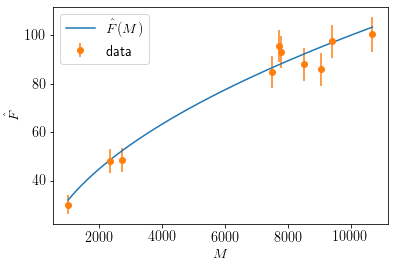

In [8]:
Fhat_err = np.sqrt(mu) / 2.
plt.plot(Mgrid, F_of_Mgrid, label=r'$\hat{F}(M)$');
plt.errorbar(M, Fhat, yerr=Fhat_err, fmt='o', label='data');
plt.xlabel(r'$M$', fontsize='x-large');
plt.ylabel(r'$\hat{F}$', fontsize='x-large');
plt.legend(fontsize='x-large');

Note that is was only ok to use the variable `mu` above because it was a deterministic function of $M$, which we claimed to know perfectly. In other words, the "error bar" is not estimated from $\hat{F}$ itself (though this is also frequently done, and is not too horrendous when the number of counts is very large).

So why would we _want_ to do this, given that it confuses uncertainty in the model with uncertainty in the constant and eternally perfect data? Well, it won't always be true that the width of the sampling distribution is solely determined by a quantity shown in the plot ($M$, in this case). For example, in the completely sensible scenario where the exposure time for each star varied, the conversion factor between $\mu$ and $F$ would correspondingly vary. Hence, there would no longer be a simple way to show the model uncertainty as a function of $M$ only in an $\hat{F}$-$M$ plot. By attaching an error bar to each point, we have a reasonable way to show model uncertainty that's specific to that point, and not trivially related to anything else in the plot.

For that matter, if the $M_i$ were not known precisely but were also measured with some uncertainty, we wouldn't know exactly what $M$ to plug in to determine the error on $\hat{F}$; we might end up using the best estimate of $M$, or basing the error bar on $\sqrt{N}$.

Note that, through all this, we're talking only about "error bars" in the context of **visualizing** the data and model. For an actual inference, we should never get confused about where the uncertainty lives - it is always with the model. That doesn't mean we can never ever use the central limit theorem to approximate certain PDFs as Gaussian, thus making our lives easier. But remember that the question of whether the theorem applies is a function _of the model_. That is, in the Poisson case, the question is whether the _predicted_ mean number of counts is large, not whether the observed number of counts is large.

To drive home this last point, consider the [Generative Models](generative_models.ipynb) (Aside)$^2$ scenario, where we measure a number of blips that come from a Poisson distribution. Say we measure 2. If we declare that the error bar is $\sqrt{2}$ and our estimate of the mean is $2 \pm \sqrt{2}$, the implication is that arbitrarily tiny values are quite plausible; naively they're within the "$2\sigma$" interval, which we all know means 95.4% probability. In reality, the probability that a mean of, say, 0.1 would produce as many as 2 blips is orders of magnitude smaller than this would imply, $\approx 1.5\times10^{-4}$. The reason for this bizarre mismatch is that we've approached things backwards and upside down: instead of beginning by asking what error we should assign to the measurement, we should simply ask what values of the mean are probable given the measurement.

## Linearized error propagation

There's a thing you might have seen before called "linearized error propagation" (or just "error propagation"). It goes like this. Suppose I somehow have a measurement, $x$, with an error bar, $\sigma_x$. Then I convert $x$ to some other quantity, $f(x)$. The corresponding error bar for $f(x)$ is given by

$\sigma^2_f = \left(\frac{\partial f}{\partial x}\right)^2 \sigma^2_x$.

If instead $f(x,y)$ were a function of 2 measurements, $x$ and $y$, it would be

$\sigma^2_f = \left(\frac{\partial f}{\partial x}\right)^2 \sigma^2_x + \left(\frac{\partial f}{\partial y}\right)^2 \sigma^2_y + 2\left(\frac{\partial f}{\partial x}\right)\left(\frac{\partial f}{\partial y}\right) \sigma^2_{xy}$,

where $\sigma^2_{xy}$ is the covariance of the $x$ and $y$ errors. And so on, for any number of measurements, or other things with an "error bar", that $f$ might depend on.

If you're noticing that the equations above are suggestively similar to the probabilistic change of variables formula, well spotted. If it is indeed the case that $x$, $y$, ... are Gaussian-distributed, _and_ the uncertainties are small (in the sense that a 1st order Taylor expansion of $f$ is valid), then this is a perfectly fine way to determine the variance of $f$, which will also be Gaussian-distributed.

If you happen to find yourself in a world full of Gaussians, this can be a convenient mathematical shortcut. We emphasize, however, that it is no more than that. In particular, the context in which these formulae are normally taught (in our experience) is entirely backwards compared to our approach. Namely, it suggests that we make measurements, assign an error bars to them, and then _work backwards_ towards the quantitity we want to infer, "propagating" the error along the way. This logic immediately collapses in the small-number Poisson measurement scenario (among other non-Gaussian cases), where the uncertainty is unambiguously a function of the model rather than a fixed number we can associate with the data. The central place of generative models in our formalism is a constant reminder that we need to think _forwards_ from the model towards the data in order to avoid such pitfalls.

#### Endnotes

##### Note 1

To be clear, this last argument, "the number that was stored by by detector is the measurement, and it isn't uncertain", is not specific to the Poisson example. Rather, it's the essence of our approach using generative models. 

I am now compelled to relate a slightly shameful episode from my grad school days. While conversing with some fellow students, it happened that one of them began venting at the statistical naivety of a biologist they knew. Apparently, this biologist had been completely baffled by the question of what their measurement errors were. "What do you mean? There were 3 people in our sample who had whatever condition, so... it's 3." We all had a good chortle about how _of course_ all measurements must have an error bar, congratulated ourselves on being much better at statistics than a mere biologist, and then adjusted the onions on our belts and went back to hunting dodos or whatever. In reality, as you now appreciate, the biologist was exactly right. Their measurement was 3, certainly. The question is not _what else might they have measured_, but _given that measurement, what do we know about the model that generated the data_?